<a href="https://colab.research.google.com/github/Abhishek180797/hotel_analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Import neccesary libraries**

In [ ]:
#importing necessery libraries for future analysis of the dataset.
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# **Loading the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/'

In [ ]:
data = pd.read_csv(path + 'Hotel Bookings.csv', encoding='latin-1', low_memory= False)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#fisrt see the shape of dataset
data.shape

(119390, 32)

In [ ]:
#We want to see last 5 rows of data set
data.tail

<bound method NDFrame.tail of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   


In [ ]:
#For analysing the data in a best way,we have to take a look on whole summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#some statistical analysis of data
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
#Find all the column names inside the database
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#lets analyse all data type in our dataset
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# ***lets start cleaning of data***

In [ ]:
#find total number of null values
print("The Total number of null values = ",data.isnull().sum().sum())

The Total number of null values =  129425


In [ ]:
#Check the the dataset for duplicate and drop the unnessesary data
data.duplicated().sum()

31994

In [ ]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [ ]:
data.drop_duplicates()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#Replace the null values of "children" column by 0
data["children"].replace(np.nan, 0, inplace=True)
data['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [ ]:
#Replace the null value of “country” column by the last value
data['country'].fillna(method='ffill',inplace=True)
data['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [ ]:
#Find Mean of "AGENT" from a dataset
data['agent'].mean()

86.69338185346919

In [ ]:
#Replace the null values in the “agent” column by mean of that column
avg_agent = data['agent'].astype('float').mean(axis=0)
print("The Average Agent Column is given that ", avg_agent)
data['agent'].replace(np.nan, avg_agent, inplace=True)

The Average Agent Column is given that  86.69338185346919


In [ ]:
data['total_people'] = data['adults'] + data['babies'] + data['children']
data['total_stay'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

# ***EDA (Exploratory Data Analysis)***

**Univariate Analysis**

In [ ]:
#Check how many different “hotel” and “customer” types are there
print("Hotel :",data['hotel'].unique())
print("Customers : ",data['customer_type'].unique())

Hotel : ['Resort Hotel' 'City Hotel']
Customers :  ['Transient' 'Contract' 'Transient-Party' 'Group']


**1) Which type of hotel is mostly prefered by the guests?**

Text(0.5, 1.0, 'Pie Chart for Most Preffered  Hotel')

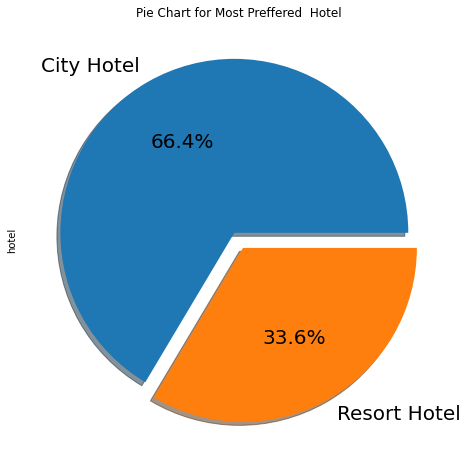

In [ ]:
data['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title('Pie Chart for Most Preffered  Hotel')

**Observation**

City Hotel is most preffered hotel by guests. Thus city hotels has maximum bookings.



**2) Which Agent made the most bookings?**

In [ ]:
# return highest bookings made by agents
highest_bookings= data.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

 # as agent 0 was NAN value and we replaced it with 0 and indicates no bookings.so droping.
highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True)

# taking top 10 bookings made by agent
top_ten_highest_bookings=highest_bookings[:10]

top_ten_highest_bookings

,agent,Most_Bookings
8,9.000000,31961
75,86.693382,16340
174,240.000000,13922
0,1.000000,7191
13,14.000000,3640
6,7.000000,3539
5,6.000000,3290
183,250.000000,2870
175,241.000000,1721
26,28.000000,1666


Text(0.5, 1.0, 'Most Bookings Made by the agent')

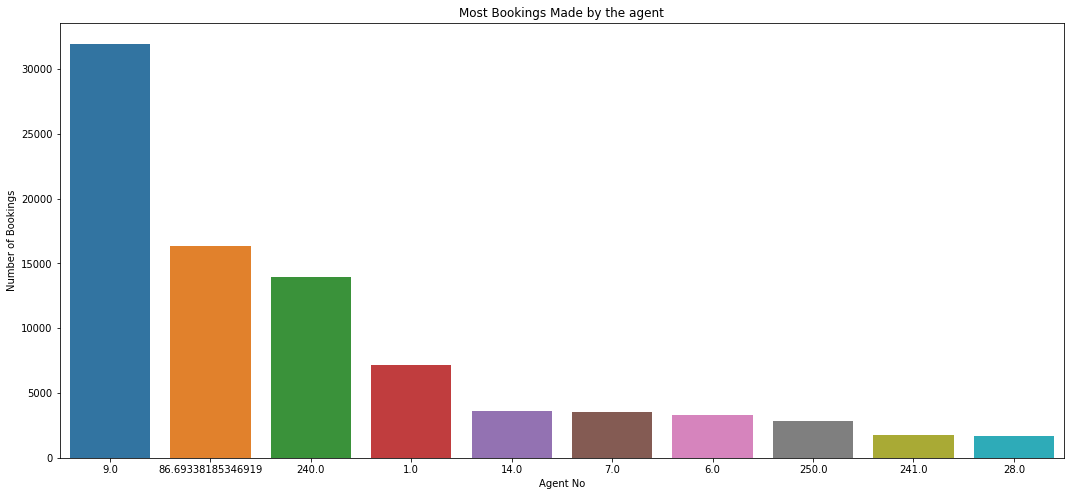

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(x=top_ten_highest_bookings['agent'],y=top_ten_highest_bookings['Most_Bookings'],order=top_ten_highest_bookings['agent'])
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the agent")

**Observation**

Agent ID no: 9 made most of the bookings

**3)What is the pecentage of cancellation?**

Text(0.5, 1.0, 'Cancellation and non Cancellation')

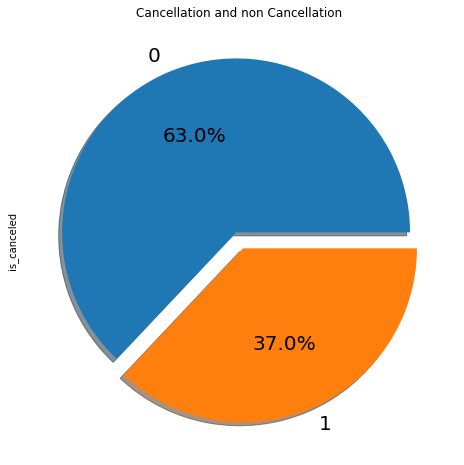

In [ ]:
data['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title("Cancellation and non Cancellation")

**Observation :**

0= not cancled

1= canceled

27.5 % of the bookings were cancelled.

**4) What is the percentage distribution of "Customer Type"?**


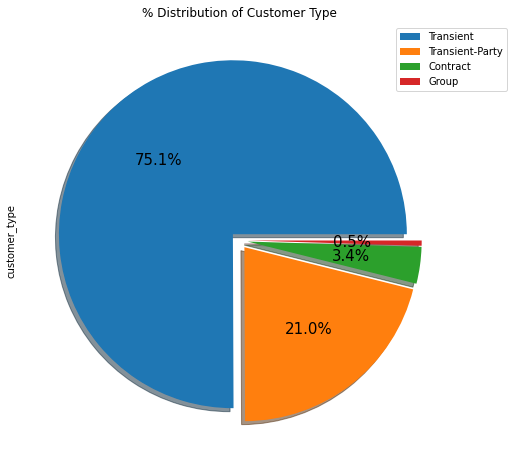

In [ ]:
data['customer_type'].value_counts().plot.pie(explode=[0.05]*4,shadow=True,autopct='%1.1f%%',figsize=(12,8),fontsize=15,labels=None)


labels=data['customer_type'].value_counts().index.tolist()
plt.title('% Distribution of Customer Type')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

**1. Contract**

when the booking has an allotment or other type of contract associated to it

**2. Group**

when the booking is associated to a group

**3. Transient**

when the booking is not part of a group or contract, and is not associated to other transient booking

**4. Transient-party**

when the booking is transient, but is associated to at least other transient booking

**Observation:**

Transient customer type is more whcih is 82.4 %. percentage of Booking associated by the Group is vey low.

**5) What is the Percentage of repeated guests?**

Text(0.5, 1.0, ' Percentgae (%) of repeated guests')

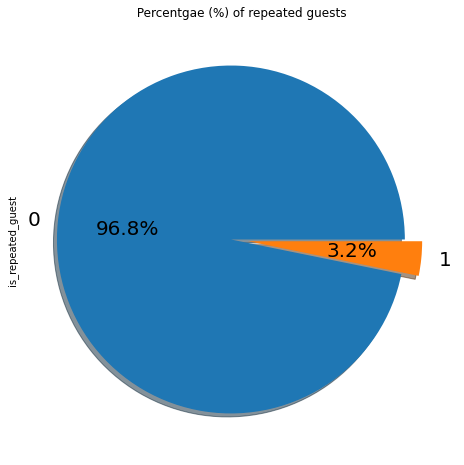

In [ ]:
data['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=True,figsize=(12,8),fontsize=20)

plt.title(" Percentgae (%) of repeated guests")

**Observation:**

Repeated guests are very few which only 3.9 %.

In order to retained the guests management should take feedbacks from guests and try to imporve the services.

**6)What is the percentage distribution of required_car_parking_spaces?**

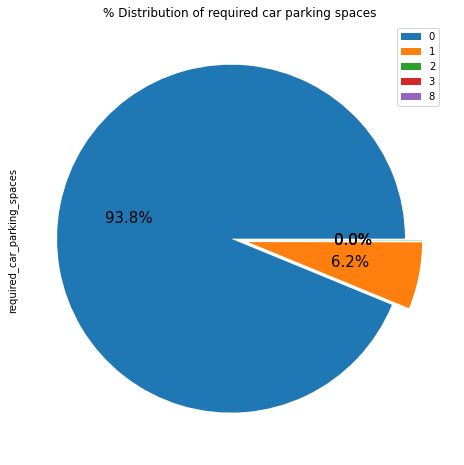

In [ ]:
data['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15,labels=None)

labels=data['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution of required car parking spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

**Observation**

91.6 % guests did not required the parking space. only 8.3 % guests required only 1 parking space.

**7)What is the percentage of booking changes made by the customer.?**

Text(0, 0.5, 'Percentage(%)')

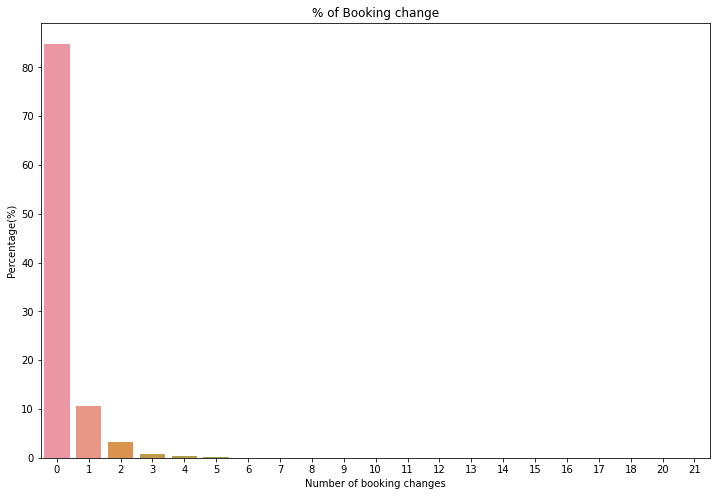

In [ ]:
booking_changes_df=data['booking_changes'].value_counts().reset_index().rename(columns={'index': "number_booking_changes",'booking_changes':'Counts'})

plt.figure(figsize=(12,8))
sns.barplot(x=booking_changes_df['number_booking_changes'],y=booking_changes_df['Counts']*100/data.shape[0])
plt.title("% of Booking change")
plt.xlabel('Number of booking changes')
plt.ylabel('Percentage(%)')

0= 0 changes made in the booking

1= 1 changes made in the booking

2= 2 changes made in the booking

**Observation**

Almost 82% of the bookings were not changed by guests.

**8)What is Percentage distribution of Deposite type ?**

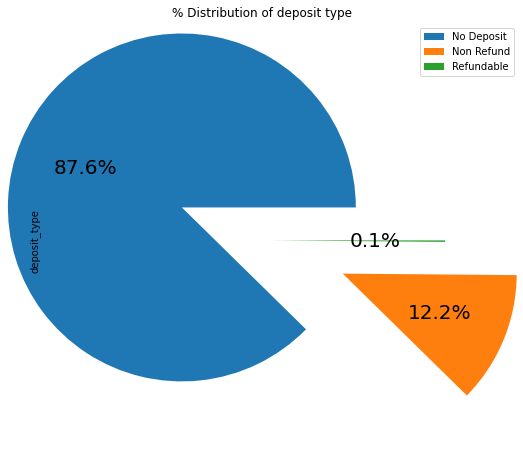

In [ ]:
data['deposit_type'].value_counts().plot.pie(explode=(0.5,0.5,0.05),autopct='%1.1f%%',shadow=False,figsize=(14,8),fontsize=20,labels=None)
plt.title("% Distribution of deposit type")
labels=data['deposit_type'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

**Observation**

98.7 % of the guests prefer "No deposit" type of deposit.

**9) Which type of food is mostly preferred by the guests?**

Text(0.5, 1.0, 'Preferred Meal Type')

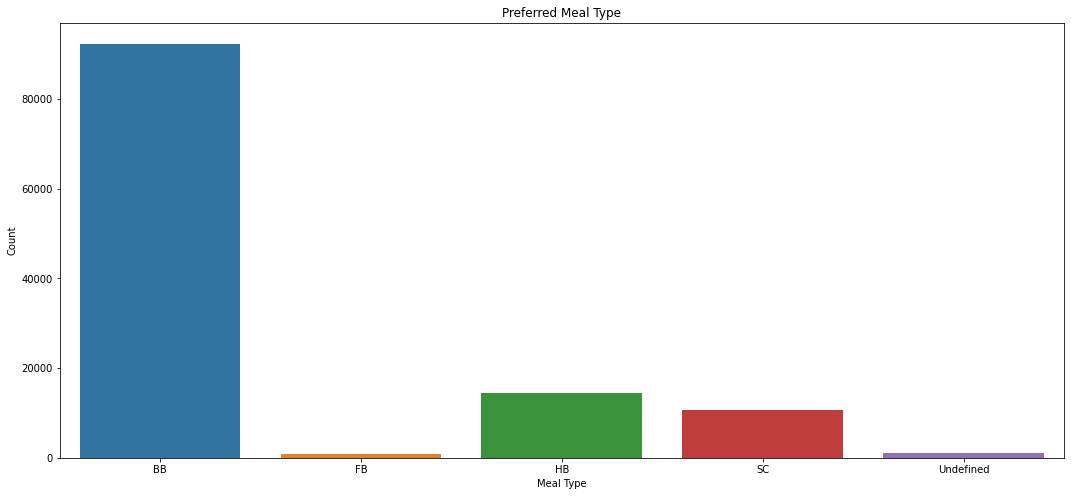

In [ ]:
# data['meal'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], autopct='%1.1f%%', shadow=True, figsize=(20,15),fontsize=20)
plt.figure(figsize=(18,8))
sns.countplot(x=data['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")

Types of meal in hotels:

BB - (Bed and Breakfast)

HB- (Half Board)

FB- (Full Board)

SC- (Self Catering)

**Observation**
* So the most preferred meal type by the guests is BB( Bed and Breakfast)
* HB- (Half Board) and SC- (Self Catering) are equally preferred.

**10) From which country the most guests are coming?**

Text(0.5, 1.0, 'Number of guests from diffrent Countries')

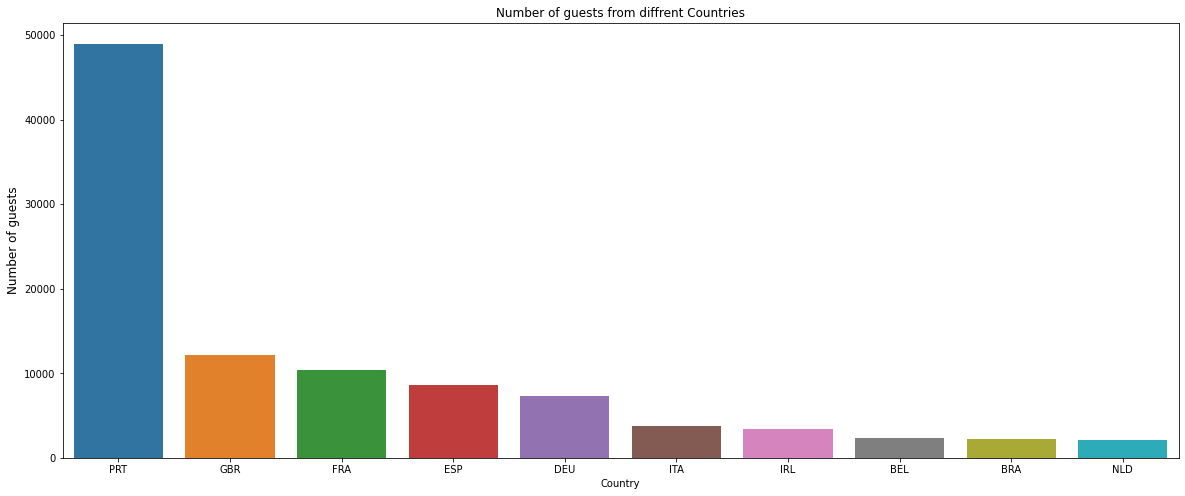

In [ ]:
# Counting the guests from various countries.
country_df=data['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]
# country_df1=df1['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})

# Visualizing by  plotting the graph
plt.figure(figsize=(20,8))
sns.barplot(x=country_df['country'],y=country_df['count of guests'])
plt.xlabel('Country')
plt.ylabel('Number of guests',fontsize=12)
plt.title("Number of guests from diffrent Countries")

**Observation**

Most of the guests are coming from portugal i.e more 25000 guests are from portugal

abbreevations for countries-

1 PRT- Portugal

2 GBR- United Kingdom

3 FRA- France

4 ESP- Spain

5 DEU - Germany

6 ITA -Itlay

7 IRL - Ireland

8 BEL -Belgium

9 BRA -Brazil

10 NLD-Netherlands

In [ ]:
#importing the folium library
import folium                                # searched on google
import plotly.express as px


In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(country_df, locations = country_df['country'],color = country_df['count of guests'], hover_name = country_df['country'])
guests_map.show()

**11) Which is the most preferred room type by the customers?**

Text(0.5, 1.0, 'Most preferred Room type')

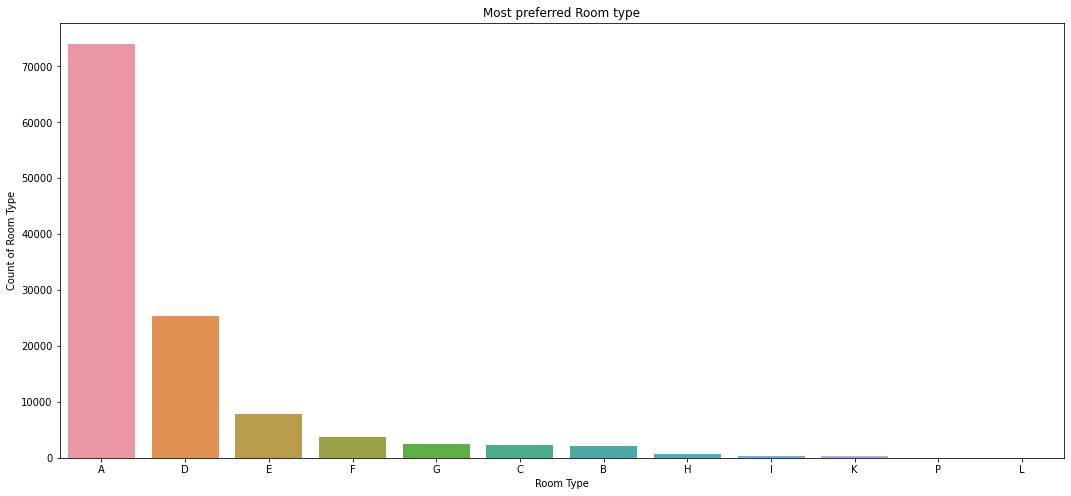

In [ ]:
#set plotsize
plt.figure(figsize=(18,8))

#plotting
sns.countplot(x=data['assigned_room_type'],order=data['assigned_room_type'].value_counts().index)
#  set xlabel for the plot
plt.xlabel('Room Type')
# set y label for the plot
plt.ylabel('Count of Room Type')
#set title for the plot
plt.title("Most preferred Room type")

**which month most of the bookings happened?**

   arrival_date_month  Counts
4             January    5929
3            February    8068
7               March    9794
0               April   11089
8                 May   11791
6                June   10939
5                July   12661
1              August   13877
11          September   10508
10            October   11160
9            November    6794
2            December    6780


Text(0, 0.5, 'Number of bookings')

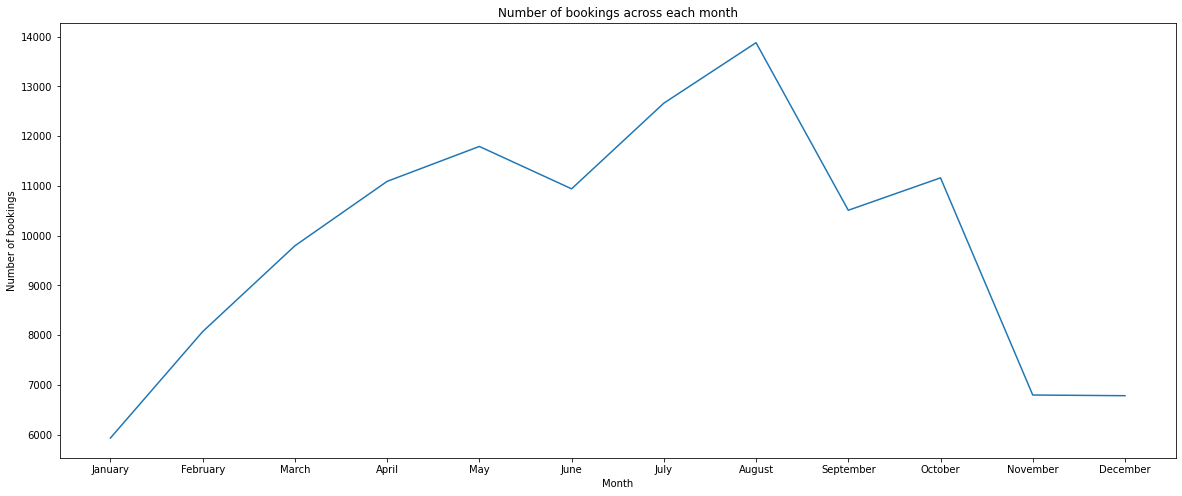

In [ ]:
# groupby arrival_date_month and taking the hotel count
bookings_by_months_data=data.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# creating df which will map the order of above months list without changing its values.
bookings_by_months_data['arrival_date_month']=pd.Categorical(bookings_by_months_data['arrival_date_month'],categories=months,ordered=True)
# sorting by arrival_date_month
bookings_by_months_data=bookings_by_months_data.sort_values('arrival_date_month')
# set plot size
plt.figure(figsize=(20,8))

print(bookings_by_months_data)

#pltting lineplot on x- months & y- booking counts
sns.lineplot(x=bookings_by_months_data['arrival_date_month'],y=bookings_by_months_data['Counts'])

# set title for the plot
plt.title('Number of bookings across each month')
#set x label
plt.xlabel('Month')
#set y label
plt.ylabel('Number of bookings')

**Mostly used distribution channel for hotel bookings**

Text(0.5, 1.0, ' Mostly Used Distribution Channel for Hotel Bookings ')

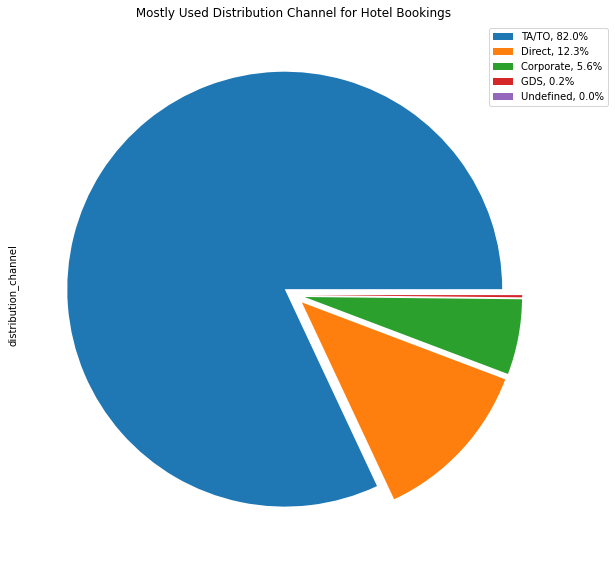

In [ ]:
#Creating labels
labels=data['distribution_channel'].value_counts().index.tolist()

# creating new df of distribution channel
distribution_channel_df=data['distribution_channel'].value_counts().reset_index().rename(columns={'index':"distribution_channel",'distribution_channel':'count'})

#adding percentage columns to the distribution_channel_df
distribution_channel_df['percentage']=round(distribution_channel_df['count']*100/data.shape[0],1)

#Creating list of percentage
sizes=distribution_channel_df['percentage'].values.tolist()

#plotting the piw chart
data['distribution_channel'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], shadow=False, figsize=(15,10),fontsize=10,labels=None)

# setting legends with the percentage values
labels = [f'{l}, {s}%' for l, s in zip(labels, sizes)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.title(' Mostly Used Distribution Channel for Hotel Bookings ')

**Year wise bookings**

Text(0.5, 1.0, 'Year Wise bookings')

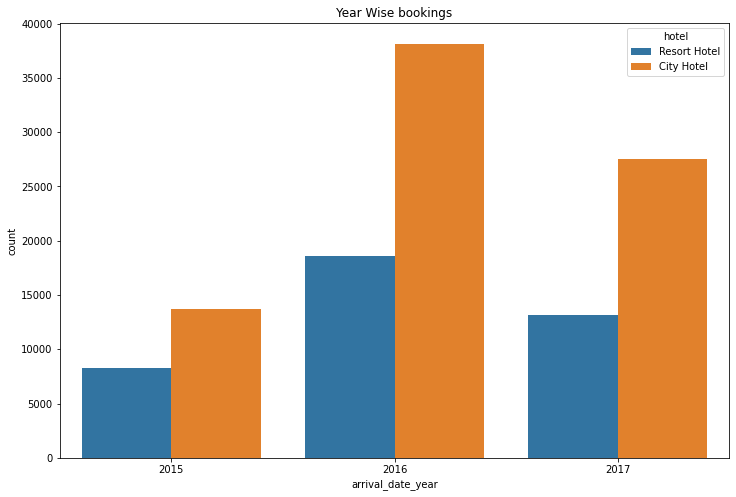

In [ ]:
plt.figure(figsize=(12,8))

#  plot with countplot
sns.countplot(x=data['arrival_date_year'],hue=data['hotel'])
plt.title("Year Wise bookings")

# **Bivariate and Multivariate Analysis**

In [ ]:
grup_by_hotel=data.groupby('hotel')

**Avg ADR of each Hotel type**

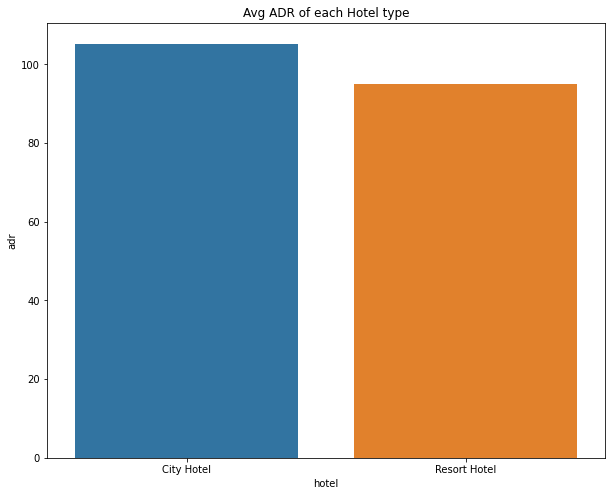

In [ ]:
highest_adr=grup_by_hotel['adr'].mean().reset_index()

# plot size
plt.figure(figsize=(10,8))

# set labels
plt.xlabel('Hotel type')
plt.ylabel('ADR')
plt.title("Avg ADR of each Hotel type")

#plot the graph
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'])

**Average Lead Time for each Hotel type**

Text(0.5, 1.0, 'Average Lead Time for each Hotel type')

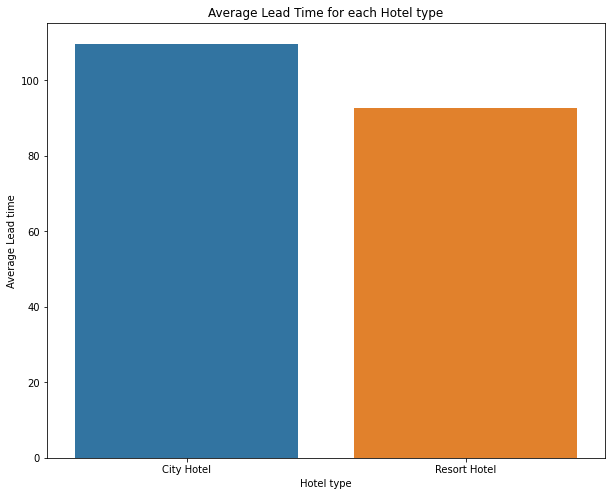

In [ ]:
avg_lead_time=grup_by_hotel['lead_time'].mean().reset_index()

#set plot size
plt.figure(figsize=(10,8))

# plot the bar plot
sns.barplot(x=avg_lead_time['hotel'],y=avg_lead_time['lead_time'])
# set lables
plt.xlabel('Hotel type')
plt.ylabel('Average Lead time')
plt.title("Average Lead Time for each Hotel type")

**hotel has highest percentage of booking cancellation**

Text(0.5, 1.0, 'Percentage of booking cancellation')

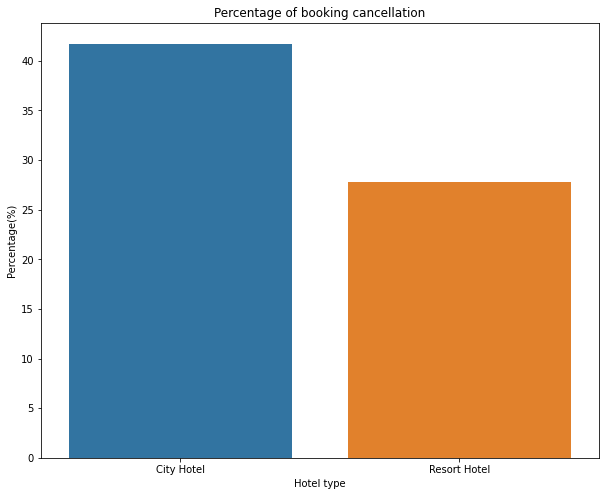

In [ ]:
# booking canceled=1
# booking not canceled= 0

# creating new DataFrame where bookings are cancelled.
canceled_df=data[data['is_canceled']==1]

# Grouping by hotel
canceled_df=canceled_df.groupby('hotel').size().reset_index().rename(columns={0: "no_of_cancelled_bookings"})

# adding 'total booking column for calculating the percentage.
canceled_df['total_booikngs']=data.groupby('hotel').size().reset_index().rename(columns={0:"total_bookings"}).drop('hotel',axis=1)
canceled_df

#plotting the barchat
plt.figure(figsize=(10,8))
sns.barplot(x=canceled_df['hotel'],y=canceled_df['no_of_cancelled_bookings']*100/canceled_df['total_booikngs'])

#set labels
plt.xlabel('Hotel type')
plt.ylabel('Percentage(%)')
plt.title("Percentage of booking cancellation")

**Waiting time for each hotel type**

Text(0.5, 1.0, 'Waiting time for each hotel type')

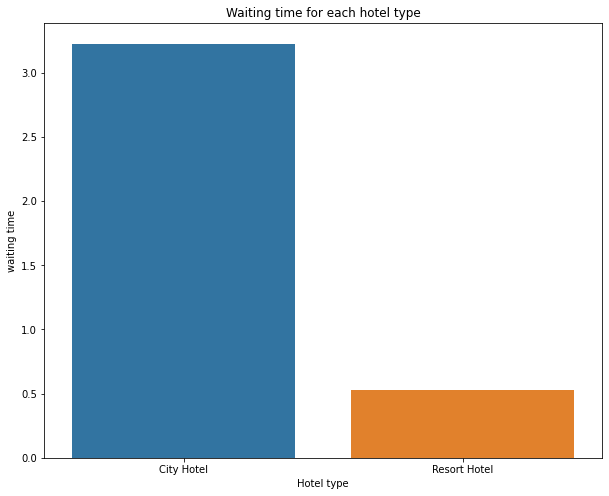

In [ ]:
#groupping by hoetl and takin mean of days in waiting list
waiting_time_df=data.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
# waiting_time_df

#set the plot size
plt.figure(figsize=(10,8))

# plot barchart
sns.barplot(x=waiting_time_df['hotel'],y=waiting_time_df['days_in_waiting_list'])

#set labels
plt.xlabel('Hotel type')
plt.ylabel('waiting time')
plt.title("Waiting time for each hotel type")

**Most repeated guests for each hotel**

Text(0.5, 1.0, 'Most repeated guests for each hotel')

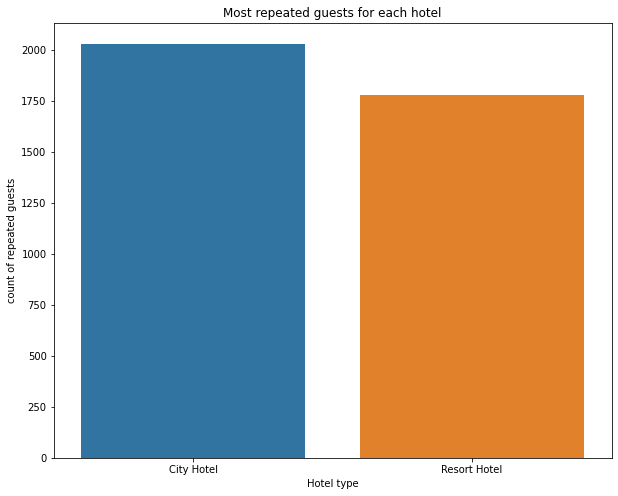

In [ ]:
# repeated guest=1
#not repeated guest=0
#groupby hotel
repeated_guests_df=data[data['is_repeated_guest']==1].groupby('hotel').size().reset_index().rename(columns={0:'number_of_repated_guests'})



#set plot size adn plot barplot
plt.figure(figsize=(10,8))
sns.barplot(x=repeated_guests_df['hotel'],y=repeated_guests_df['number_of_repated_guests'])

# set labels
plt.xlabel('Hotel type')
plt.ylabel('count of repeated guests')
plt.title("Most repeated guests for each hotel")

**Observstion**


City Hotel has slightly more repeated guests than the Resort Hotels. It is almost similar for both hotels.

ADR across the different months.

In [ ]:
#groupby
bookings_by_months_df=data.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()
#create month list
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# it will take the order of the month list in the df along with values
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
#sortting
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')
bookings_by_months_df

,arrival_date_month,hotel,adr
8,January,City Hotel,82.628986
9,January,Resort Hotel,49.461883
6,February,City Hotel,85.088278
7,February,Resort Hotel,55.171930
15,March,Resort Hotel,57.520147
14,March,City Hotel,92.643116
0,April,City Hotel,111.251838
1,April,Resort Hotel,77.849496
17,May,Resort Hotel,78.758134
16,May,City Hotel,121.638560


Text(0, 0.5, 'ADR')

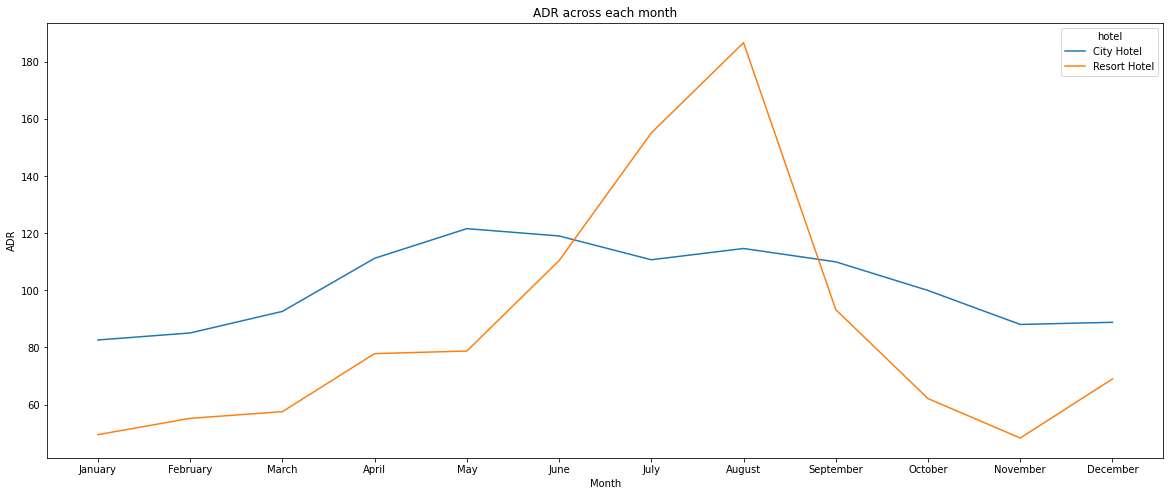

In [ ]:
# set plot size and plot the line
plt.figure(figsize=(20,8))
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['adr'],hue=bookings_by_months_df['hotel'])

# set lables
plt.title('ADR across each month')
plt.xlabel('Month')
plt.ylabel('ADR')

**Observation**

For Resort hotel is ADR is high in the months June,July,August as compared to City Hotels. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.

The best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December as the avrage daily rate in this month is very low.

**Which distribution channel contributed more to adr in order to increase the the income.?**

Text(0.5, 1.0, 'ADR across Distribution channel')

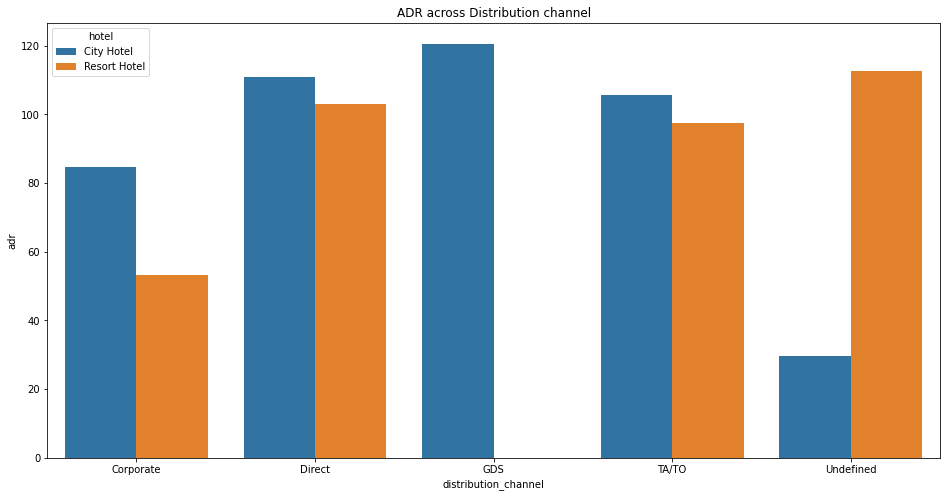

In [ ]:
# group by distribution channel and hotel
distribution_channel_df=data.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

# set plot size and plot barchart
plt.figure(figsize=(16,8))
sns.barplot(x='distribution_channel', y='adr', data=distribution_channel_df, hue='hotel')
plt.title('ADR across Distribution channel')

* Corporate- These are corporate hotel booing companies which makes bookings possible.
* GDS-A GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.
* Direct- means that bookings are directly made with the respective hotels
* TA/TO- means that booings are made through travel agents or travel operators.
* Undefined- Bookings are undefined. may be customers made their bookings on arrival.

**Observation

From the plot is clear that

'Direct' and 'TA/TO' has almost equally contributed in adr in both type of hotels i.e. 'City Hotel' and 'Resort Hotel'.

GDS has highly contributed in adr in 'City Hotel' type.

GDS needs to increase Resort Hotel bookings.**

**distribution channel has the higest cancellation rate**

Text(0.5, 1.0, 'Cancellation Rate Vs Distribution channel')

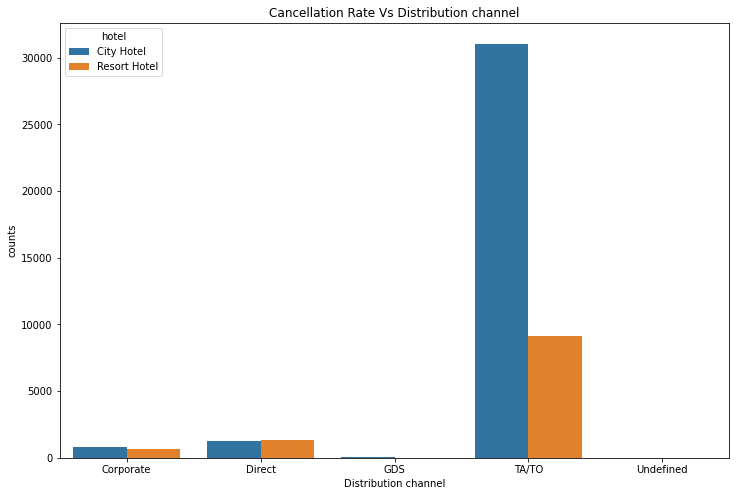

In [ ]:
canceled_df=data[data['is_canceled']==1] # 1= canceled

#group by distribution channel
canceled_df=canceled_df.groupby(['distribution_channel','hotel']).size().reset_index().rename(columns={0:'Counts'})
# canceled_df['Percentage']=canceled_df['Counts']*100/df1[df1['is_canceled']==1][0]
canceled_df

#set plot size and plot barchart
plt.figure(figsize=(12,8))
sns.barplot(x='distribution_channel',y='Counts',hue="hotel",data=canceled_df)

# set labels
plt.xlabel('Distribution channel')
plt.ylabel('counts')
plt.title('Cancellation Rate Vs Distribution channel')

**Observation**

* In "TA/TO", City hotels has the high cancellation rate compared to resort hotels.

* In "direct" both the hotels has almost same cancellation rate.

**Market Segment has the higest cancellation rate**

In [ ]:
market_segment_df=data[data['is_canceled']==1]   # canceled=1
market_segment_df
market_segment_df=market_segment_df.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})   # group by

market_segment_df

,market_segment,hotel,counts
0,Aviation,City Hotel,52
1,Complementary,City Hotel,64
2,Complementary,Resort Hotel,33
3,Corporate,City Hotel,641
4,Corporate,Resort Hotel,351
5,Direct,City Hotel,1056
6,Direct,Resort Hotel,878
7,Groups,City Hotel,9623
8,Groups,Resort Hotel,2474
9,Offline TA/TO,City Hotel,7173


Text(0.5, 1.0, 'Cancellation Rate Vs market_segment')

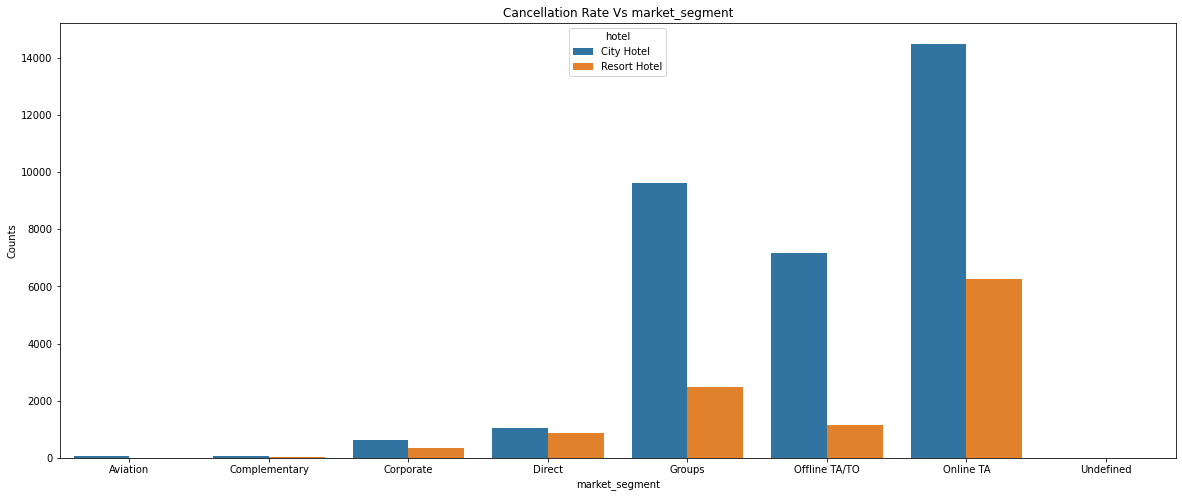

In [ ]:
#set plotsizde and plot barchart
plt.figure(figsize=(20,8))
sns.barplot(x='market_segment',y='counts',hue="hotel",data= market_segment_df)

# set labels
plt.xlabel('market_segment')
plt.ylabel('Counts')
plt.title('Cancellation Rate Vs market_segment')

**Observation**

**'Online T/A' has the highest cancellation in both type of cities**

In order to reduce the booking cancellations hotels need to set the refundable/ no refundable and deposit policies policies

**Does the guests alloted with the same room type which was reserved by them?**

In [ ]:
# Define a function for the reserved room type is same  or not as  assigned room type
def same_room_allotment(x):
  '''function to check whether the reserved room
  type is same  or not as  assigned room type'''

  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0

([<matplotlib.axis.XTick at 0x7fa6b9bf4e10>,
 [Text(0, 0, 'Not canceled'), Text(0, 0, 'canceled')])

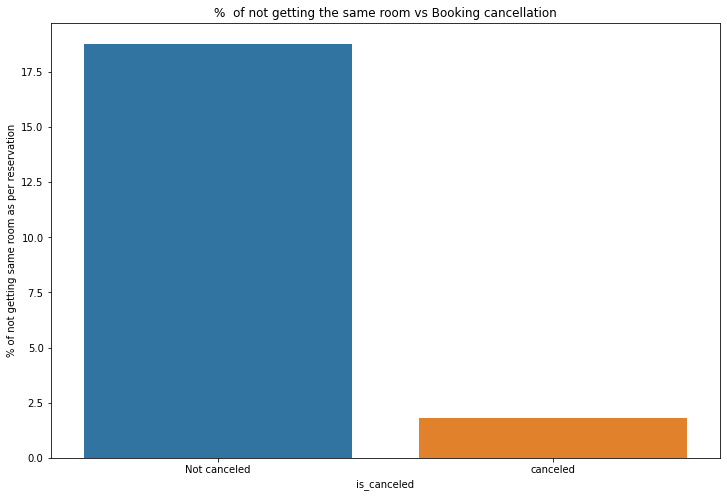

In [ ]:
# create new column to df1
data['Same_room_alloted_or_not']=data.apply(lambda x: same_room_allotment(x),axis=1)

#groupby is canceled
grp_by_canceled_df=data.groupby('is_canceled')

# create DF and calculate  percentage of same room alloted  or not
DF=pd.DataFrame(grp_by_canceled_df['Same_room_alloted_or_not'].sum()*100/grp_by_canceled_df.size()).rename(columns={0:"percentage"})
DF

#set plot size and plot barchart
plt.figure(figsize=(12,8))
sns.barplot(x=DF.index,y=DF['percentage'])

# set labels
plt.title('%  of not getting the same room vs Booking cancellation')
plt.xlabel('is_canceled')
plt.ylabel('% of not getting same room as per reservation')
plt.xticks([0,1],['Not canceled','canceled'])

**Obseravtion**

**Its is clear that there is no much(2.5%) effect on cancellation of the bookings even if the guests are not assigned with rooms which they reserved during booking.**

**ADR across different market segment**

Text(0.5, 1.0, 'Adr across market segment')

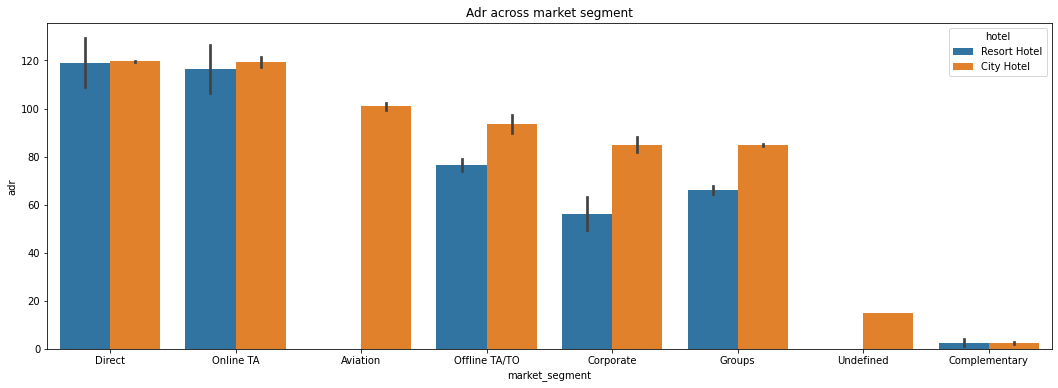

In [ ]:
Grupby=data.groupby(['market_segment','hotel','is_canceled'])['adr'].mean().reset_index()   # group by

# set plot size and plto barchart
plt.figure(figsize=(18,6))
sns.barplot(x='market_segment',y='adr',hue='hotel',data=Grupby.sort_values(by='adr',ascending=False))
plt.title('Adr across market segment')

**Obseravtion**

**'Direct' and 'Online TA' are contributing the most in both types of hotels.**

**Aviation segment should focus on increasing the bookings of 'City Hotel'**

**Optimal stay length in both types of hotels ?**

In [ ]:
stay = data.groupby(['total_stay', 'hotel']).agg('count').reset_index()   # group by total stay and hotel
stay = stay.iloc[:, :3]                                                   # take 1st 3 columns
stay = stay.rename(columns={'is_canceled':'Number of stays'})    # rename the columns

Text(0.5, 0, 'total_stay(days)')

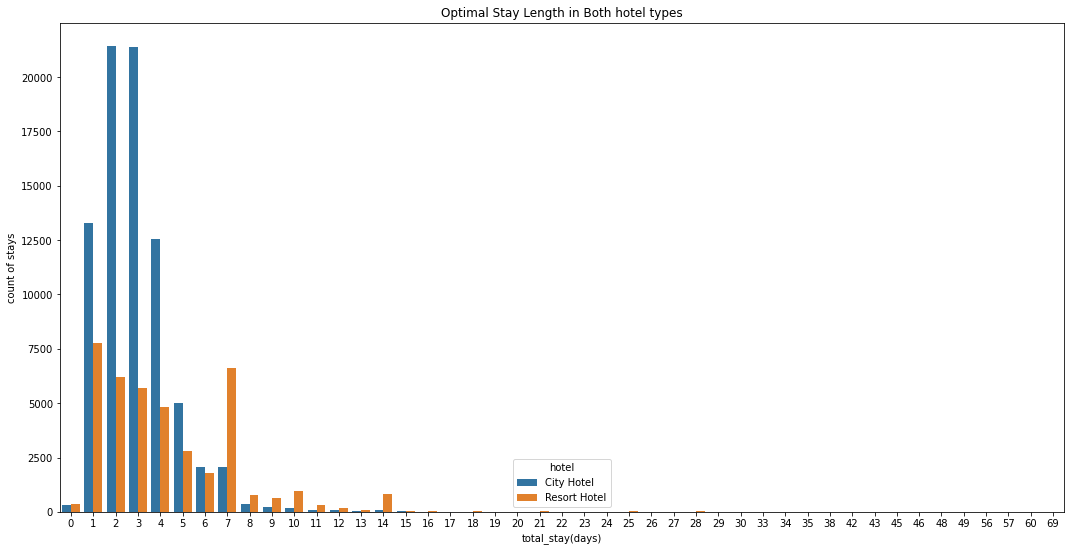

In [ ]:
# set plot size and plot barchart
plt.figure(figsize=(18,9))
sns.barplot(x='total_stay',y='Number of stays',hue='hotel',data=stay)

#set labels
plt.title('Optimal Stay Length in Both hotel types')
plt.ylabel('count of stays')
plt.xlabel('total_stay(days)')

**Observation:**

Optimal stay in both the type hotel is less than 7 days.

**Relationship between ADR and total stay**

In [ ]:
# Groupby adr,total,stay,hotel,
adr_vs_stay = data.groupby(['total_stay', 'adr','hotel']).agg('count').reset_index()
adr_vs_stay = adr_vs_stay.iloc[:, :3]
adr_vs_stay = adr_vs_stay.rename(columns={'is_canceled':'Number of stays'})
adr_vs_stay=adr_vs_stay[:18000]
adr_vs_stay

,total_stay,adr,hotel
0,0,0.00,City Hotel
1,0,0.00,Resort Hotel
2,1,0.00,City Hotel
3,1,0.00,Resort Hotel
4,1,1.00,City Hotel
...,...,...,...
17995,7,210.86,Resort Hotel
17996,7,211.00,Resort Hotel
17997,7,211.03,Resort Hotel
17998,7,211.16,Resort Hotel


As the total stay increases the adr also increases.

**Correlation of the columns**

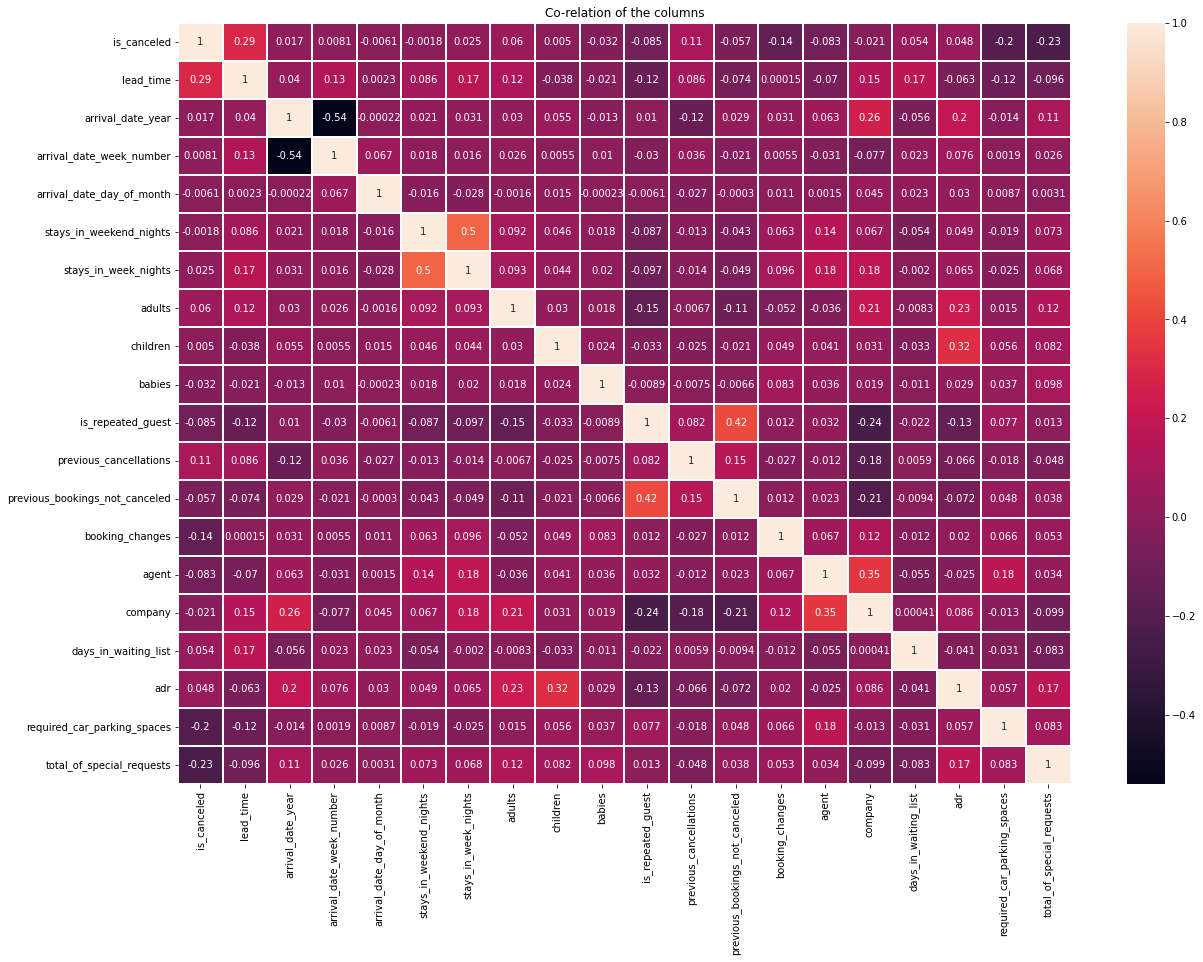

In [ ]:
plt.figure(figsize=(20,14))
plt.title('Co-relation of the columns')
cor = data.corr()
sns.heatmap(cor, annot = True ,linewidths = 1)
plt.show()

1) is_canceled and same_room_alloted_or_not are negatively corelated. That means customer is unlikely to cancel his bookings if he don't get the same room as per reserved room. We have visualized it above.

2) lead_time and total_stay is positively corelated.That means more is the stay of cutsomer more will be the lead time.

3)adults,childrens and babies are corelated to each other. That means more the people more will be adr.

4) is_repeated guest and previous bookings not canceled has strong corelation. may be repeated guests are not more likely to cancel their bookings.

**Relationship between the repeated guests and previous bookings not canceled**

In [ ]:
repeated_guests_df=data[data['is_repeated_guest']==1]
repeated_guests_df_1=data[data['is_repeated_guest']==0]

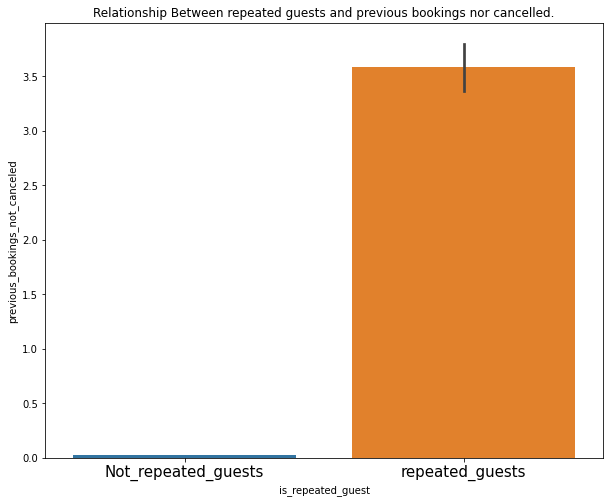

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['is_repeated_guest'],y= data['previous_bookings_not_canceled'])
plt.xticks([0,1],['Not_repeated_guests','repeated_guests'],fontsize=15)
plt.title('Relationship Between repeated guests and previous bookings nor cancelled.')
plt.show()

Text(0.5, 1.0, 'Relationship between adr and total stay')

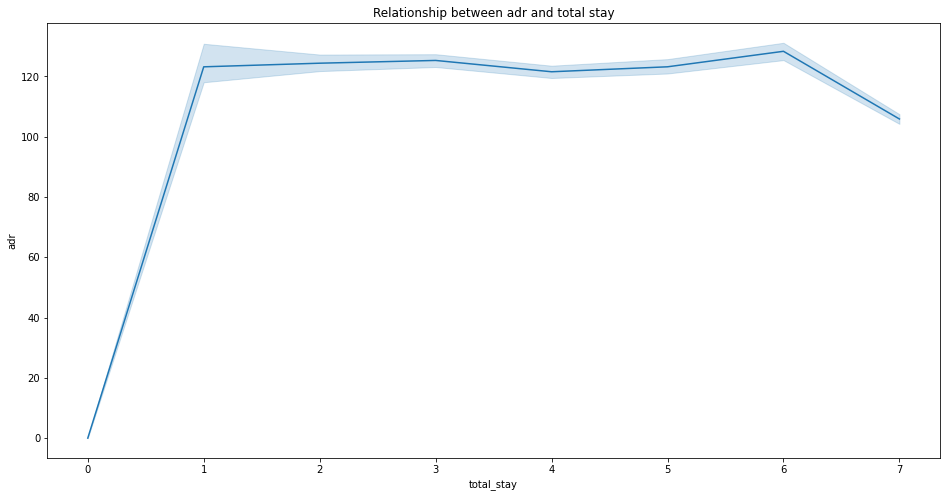

In [ ]:
#plot line chart
plt.figure(figsize=(16,8))
sns.lineplot(x='total_stay',y='adr',data=adr_vs_stay)
plt.title('Relationship between adr and total stay')

**Observation**

Not Repeated guests are more likely to cancel their bookings.

In [ ]:
data.drop(data[data['adr'] > 5000].index, inplace = True)

Text(0.5, 1.0, 'Relationship between  adr and total stay')

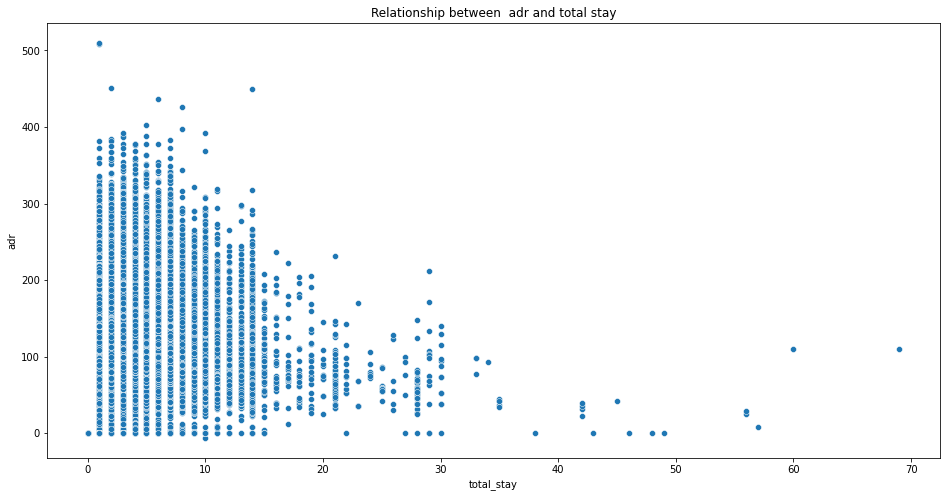

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=data['total_stay'],y=data['adr'])
plt.title('Relationship between  adr and total stay')

From above scatter we can say that as the stay increases adr is decreasing. Thus for longer stays customer can get good adr.

**ADR relationship with total number of people**

Text(0.5, 1.0, 'ADR v/s Total Number of people')

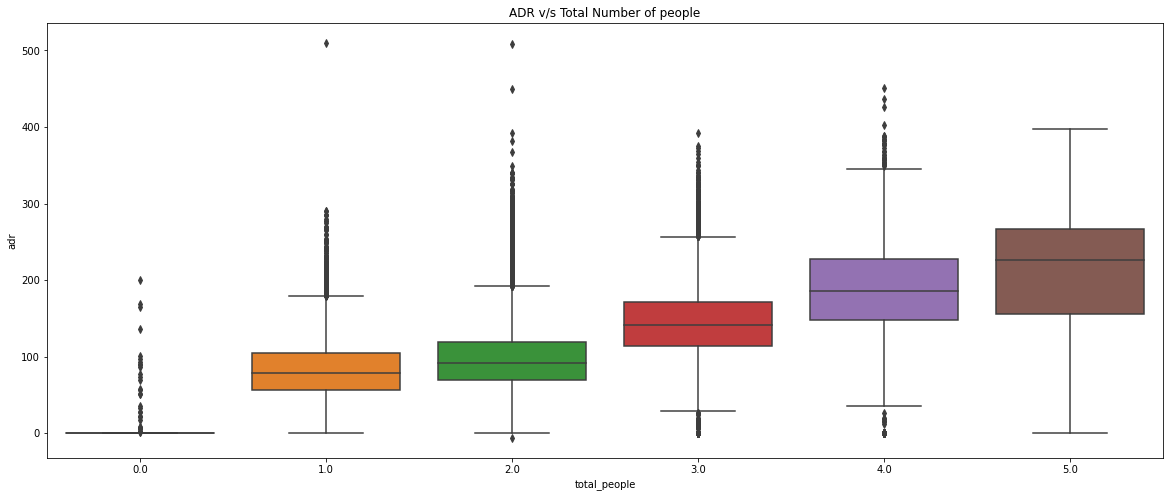

In [ ]:
plt.figure(figsize=(20,8))
data1=data[data['total_people'] < 6]

sns.boxplot(x=data1['total_people'],y=data1['adr'])

# set lables
plt.title('ADR v/s Total Number of people')

**As the total number of people increases adr also increases.**

**Thus adr and total people are directly proportional to each other.**

**CONCLUSION**

1.City hotels are the most preferred hotel type by the guests. We can say City hotel is the busiest hotel.

2.27.5 % bookings were got cancelled out of all the bookings.

3.Only 3.9 % people were revisited the hotels. Rest 96.1 % were new guests. Thus retention rate is low.

4.The percentage of 0 changes made in the booking was more than 82 %. Percentage of Single changes made was about 10%.

5.Most of the customers (91.6%) do not require car parking spaces.

6.79.1 % bookings were made through TA/TO (travel agents/Tour operators).

7.BB( Bed & Breakfast) is the most preferred type of meal by the guests.

8.Maximum number of guests were from Portugal, i.e. more than 25000 guests.

9.Most of the bookings for City hotels and Resort hotel were happened in 2016.

10.Average ADR for city hotel is high as compared to resort hotels. These City hotels are generating more revenue than the resort hotels.

11.Booking cancellation rate is high for City hotels which almost 30 %.

12.Average lead time for resort hotel is high.

13.Waiting time period for City hotel is high as compared to resort hotels. That means city hotels are much busier than Resort hotels.

14.Resort hotels have the most repeated guests.

15.Optimal stay in both the type hotel is less than 7 days. Usually people stay for a week.

16.Almost 19 % people did not cancel their bookings even after not getting the same room which they reserved while booking hotel. Only 2.5 % people cancelled the booking.